In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("datasets/monica.csv")
df.head()

,Serial No.,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,live,f,63,85,n,x,n,y,y,n,n,y
1,2,live,m,59,85,y,x,n,y,n,n,n,y
2,3,live,m,68,85,n,n,n,y,n,n,n,y
3,4,live,m,46,85,n,c,n,n,n,n,n,y
4,5,dead,m,48,85,n,n,y,n,n,y,n,y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367 entries, 0 to 6366
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Serial No.  6367 non-null   int64 
 1   outcome     6367 non-null   object
 2   sex         6367 non-null   object
 3   age         6367 non-null   int64 
 4   yronset     6367 non-null   int64 
 5   premi       6367 non-null   object
 6   smstat      6367 non-null   object
 7   diabetes    6367 non-null   object
 8   highbp      6367 non-null   object
 9   hichol      6367 non-null   object
 10  angina      6367 non-null   object
 11  stroke      6367 non-null   object
 12  hosp        6367 non-null   object
dtypes: int64(3), object(10)
memory usage: 646.8+ KB


In [6]:
df.shape

(6367, 13)

# Data Visualisation

<Axes: xlabel='age', ylabel='Density'>

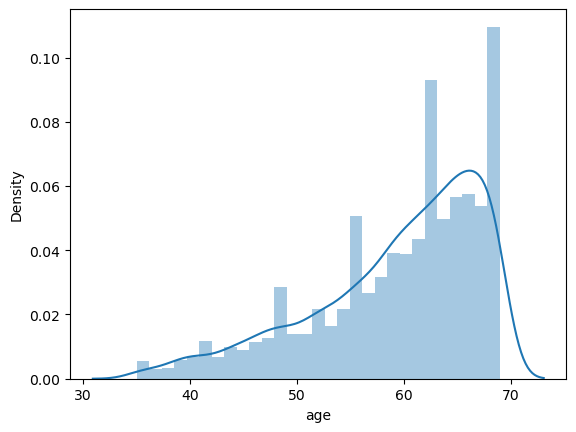

In [8]:
sns.distplot(df.age)

<Axes: >

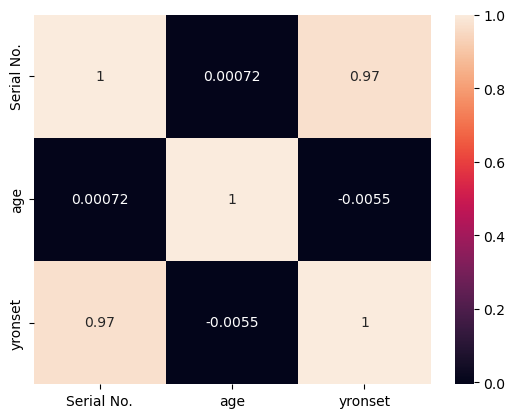

In [12]:
sns.heatmap(df.corr(numeric_only=True) , annot = True)


<Axes: ylabel='age'>

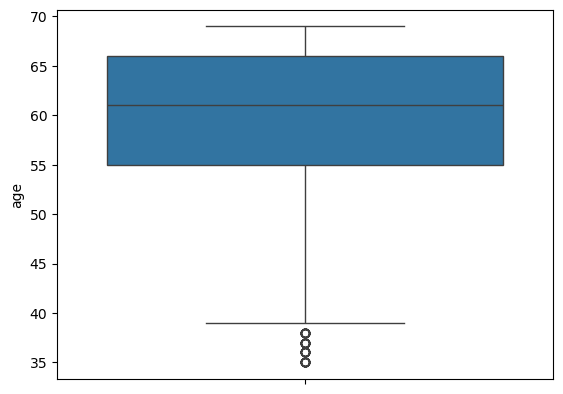

In [13]:
sns.boxplot(df.age)

In [17]:
df.select_dtypes(include="int64").columns

Index(['Serial No.', 'age', 'yronset'], dtype='object')

In [18]:
df = df.drop(columns=['Serial No.'])

In [19]:
df.head()

,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,live,f,63,85,n,x,n,y,y,n,n,y
1,live,m,59,85,y,x,n,y,n,n,n,y
2,live,m,68,85,n,n,n,y,n,n,n,y
3,live,m,46,85,n,c,n,n,n,n,n,y
4,dead,m,48,85,n,n,y,n,n,y,n,y


In [20]:
df.isnull().sum()

outcome     0
sex         0
age         0
yronset     0
premi       0
smstat      0
diabetes    0
highbp      0
hichol      0
angina      0
stroke      0
hosp        0
dtype: int64

In [21]:
df.describe()

,age,yronset
count,6367.000000,6367.000000
mean,59.419978,88.749018
std,7.853923,2.558180
min,35.000000,85.000000
25%,55.000000,87.000000
50%,61.000000,89.000000
75%,66.000000,91.000000
max,69.000000,93.000000


In [23]:
cat_columns = df.select_dtypes(include='O').columns
cat_columns

Index(['outcome', 'sex', 'premi', 'smstat', 'diabetes', 'highbp', 'hichol',
       'angina', 'stroke', 'hosp'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,0,63,85,0,3,0,2,2,0,0,1
1,1,1,59,85,2,3,0,2,0,0,0,1
2,1,1,68,85,0,1,0,2,0,0,0,1
3,1,1,46,85,0,0,0,0,0,0,0,1
4,0,1,48,85,0,1,2,0,0,2,0,1


<Axes: >

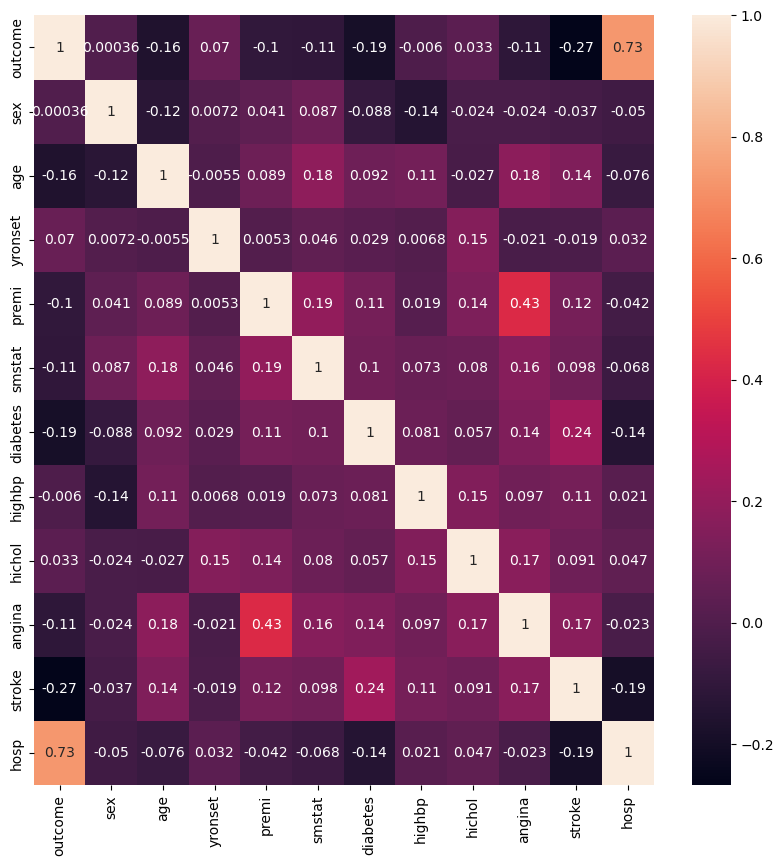

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [31]:
df.corr()

,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
outcome,1.000000,0.000358,-0.158887,0.070243,-0.103184,-0.105989,-0.191405,-0.005992,0.032737,-0.110970,-0.267649,0.731088
sex,0.000358,1.000000,-0.124406,0.007242,0.040823,0.086931,-0.087890,-0.141900,-0.024003,-0.023760,-0.037356,-0.050238
age,-0.158887,-0.124406,1.000000,-0.005495,0.088682,0.184515,0.092399,0.106685,-0.026929,0.182043,0.143146,-0.076315
yronset,0.070243,0.007242,-0.005495,1.000000,0.005345,0.046021,0.028568,0.006805,0.154629,-0.021107,-0.019123,0.032334
premi,-0.103184,0.040823,0.088682,0.005345,1.000000,0.194157,0.113223,0.018609,0.136893,0.428826,0.115292,-0.042181
smstat,-0.105989,0.086931,0.184515,0.046021,0.194157,1.000000,0.103640,0.072676,0.079846,0.161169,0.098441,-0.068081
diabetes,-0.191405,-0.087890,0.092399,0.028568,0.113223,0.103640,1.000000,0.081430,0.057439,0.142064,0.239396,-0.143615
highbp,-0.005992,-0.141900,0.106685,0.006805,0.018609,0.072676,0.081430,1.000000,0.147364,0.096814,0.110935,0.021269
hichol,0.032737,-0.024003,-0.026929,0.154629,0.136893,0.079846,0.057439,0.147364,1.000000,0.170217,0.091115,0.047016
angina,-0.110970,-0.023760,0.182043,-0.021107,0.428826,0.161169,0.142064,0.096814,0.170217,1.000000,0.172690,-0.022676


In [32]:
X = df.drop(columns=["outcome"])
y = df.outcome

In [34]:
y.unique()

array([1, 0])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
lr.score(X_test,y_test)

0.847723704866562